In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import get_scorer_names

In [ ]:
data = pd.read_csv(r'/content/housePrice.csv')

In [ ]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000.00,61666.67
1,60,1,True,True,True,Shahran,1850000000.00,61666.67
2,79,2,True,True,True,Pardis,550000000.00,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000.00,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000.00,233333.33


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Room,3479.00,2.08,0.76,0.00,2.00,2.00,2.00,5.00
Price,3479.00,5359022710.58,8099934524.33,3600000.00,1418250000.00,2900000000.00,6000000000.00,92400000000.00
Price(USD),3479.00,178634.09,269997.82,120.00,47275.00,96666.67,200000.00,3080000.00


In [ ]:
data['Area']=pd.to_numeric(data['Area'],errors='coerce')

In [ ]:
data.dropna(subset=('Area'),inplace=True)

In [ ]:
data["Area"].astype(np.int64)

0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3473, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3473 non-null   float64
 7   Price(USD)  3473 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 173.0+ KB


In [ ]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
              ..
Yousef Abad    0
Zafar          0
Zaferanieh     0
Zargandeh      0
Zibadasht      0
Length: 199, dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,3473.00,106.77,69.37,30.00,69.00,90.00,120.00,929.00
Room,3473.00,2.08,0.76,0.00,2.00,2.00,2.00,5.00
Price,3473.00,5354621367.72,8104057560.44,3600000.00,1415000000.00,2880000000.00,6000000000.00,92400000000.00
Price(USD),3473.00,178487.38,270135.25,120.00,47166.67,96000.00,200000.00,3080000.00


In [ ]:
data.hist()
plt.tight_layout()

In [ ]:
data[data["Area"]>700]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
573,863.00,2,1,1,1,Gheitarieh,7830000000.00,261000.00
831,750.00,5,1,1,1,Mahmoudieh,75000000000.00,2500000.00
1694,929.00,5,1,1,0,Zafar,80000000000.00,2666666.67
1810,705.00,5,1,1,0,Abazar,91000000000.00,3033333.33
1974,900.00,3,1,1,0,Damavand,8500000000.00,283333.33
3115,750.00,5,1,1,0,Varamin - Beheshti,3500000000.00,116666.67


In [ ]:
data[['Parking','Warehouse','Elevator']]=data[['Parking','Warehouse','Elevator']].astype(int)

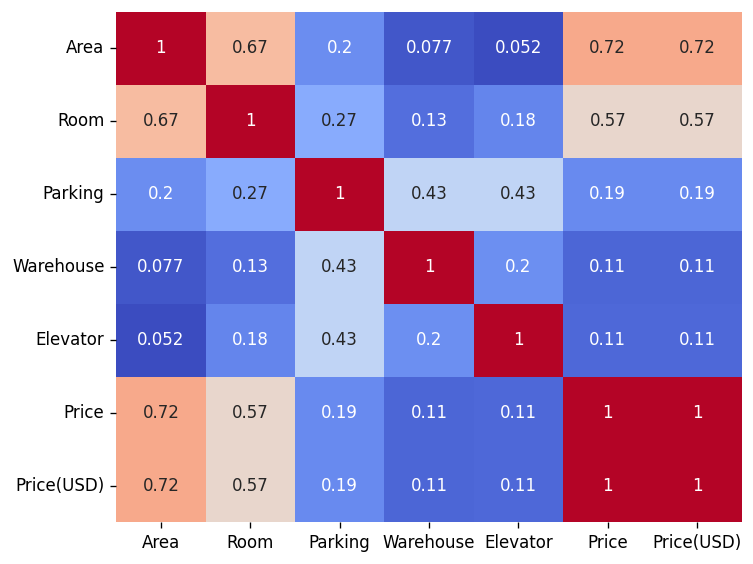

In [ ]:
plt.figure(dpi=120)
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,cbar=False)
plt.tight_layout()

<Axes: xlabel='Area', ylabel='Density'>

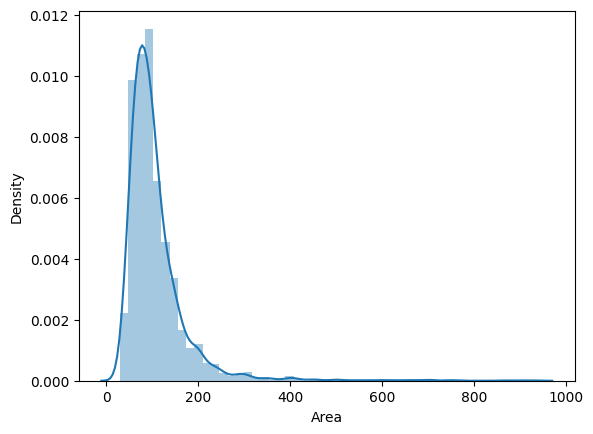

In [ ]:
sns.distplot(data["Area"])

<Axes: >

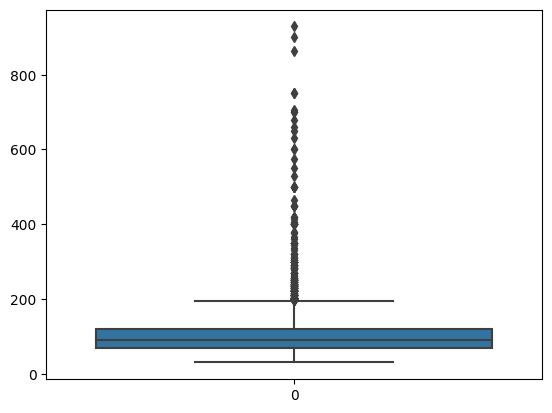

In [ ]:
sns.boxplot(data["Area"])

In [ ]:
sns.pairplot(data)

In [ ]:
data['Room'].value_counts()

2    1956
3     731
1     673
4      70
5      33
0      10
Name: Room, dtype: int64

In [ ]:
data["Address"].value_counts()

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: Address, Length: 192, dtype: int64

In [ ]:
data["Address"].nunique()

192

In [ ]:
data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [ ]:
X=data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']].to_numpy()
X

array([[ 63.,   1.,   1.,   1.,   1.],
       [ 60.,   1.,   1.,   1.,   1.],
       [ 79.,   2.,   1.,   1.,   1.],
       ...,
       [ 75.,   2.,   0.,   0.,   0.],
       [105.,   2.,   1.,   1.,   1.],
       [ 82.,   2.,   0.,   1.,   1.]])

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.63116113, -1.42325455,  0.42342287,  0.30523705,  0.5194569 ],
       [-0.67441648, -1.42325455,  0.42342287,  0.30523705,  0.5194569 ],
       [-0.40046592, -0.10513107,  0.42342287,  0.30523705,  0.5194569 ],
       ...,
       [-0.45813973, -0.10513107, -2.36170521, -3.27614226, -1.92508755],
       [-0.02558621, -0.10513107,  0.42342287,  0.30523705,  0.5194569 ],
       [-0.35721057, -0.10513107, -2.36170521,  0.30523705,  0.5194569 ]])

In [ ]:
y=data[["Price(USD)"]].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [15:01<00:00, 21.47s/it]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.00,1.00,0.00,0.40
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.17
LarsCV,1.00,1.00,0.00,0.43
LassoLarsIC,1.00,1.00,0.00,0.19
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.06
PassiveAggressiveRegressor,1.00,1.00,0.08,1.83
LassoLars,1.00,1.00,1.03,0.06
RidgeCV,1.00,1.00,10.37,0.17
Lasso,1.00,1.00,19.68,0.07


In [ ]:
one_hot = pd.get_dummies(data['Address'])
data.pop("Address")
data=data.join(one_hot)

In [ ]:
X=data.to_numpy()
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [13:34<00:00, 19.40s/it]


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.00,1.00,0.00,0.40
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.17
LarsCV,1.00,1.00,0.00,0.43
LassoLarsIC,1.00,1.00,0.00,0.19
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.06
PassiveAggressiveRegressor,1.00,1.00,0.08,1.83
LassoLars,1.00,1.00,1.03,0.06
RidgeCV,1.00,1.00,10.37,0.17
Lasso,1.00,1.00,19.68,0.07


In [ ]:
lr = PassiveAggressiveRegressor()
lr.fit(X_train,y_train)

PassiveAggressiveRegressor()

In [ ]:
y_train_hat = lr.predict(X_train)
y_hat = lr.predict(X_test)

In [ ]:
print(mean_squared_error(y_train,y_train_hat))
print(mean_squared_error(y_test,y_hat))
print(r2_score(y_train,y_train_hat))
print(r2_score(y_test,y_hat))

0.006381603903288965
501437822.0153271
0.9999999999999115
0.9934086302396679


In [ ]:
print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [ ]:
scores = cross_validate(lr, X, y, cv=5,
                       scoring=('r2', 'neg_root_mean_squared_error'),
                        return_train_score=True)
result=pd.DataFrame(scores)

ValueError: ignored

In [ ]:
result

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.52,0.01,0.99,1.00,-22392.81,-0.08
1,2.18,0.01,1.00,1.00,-16561.78,-0.08
2,1.64,0.00,0.99,1.00,-22432.65,-0.07
3,1.32,0.00,0.98,1.00,-29382.33,-0.09
4,1.42,0.00,0.98,1.00,-32293.46,-0.08


In [ ]:
round(result['test_r2'].mean(),3)

0.989